# 📖 Git Merge, Reset, and Revert: A Complete Guide

## 🔍 Understanding Merge Commits
A **merge commit** is created when Git combines two branches together. However, sometimes after merging, we realize that the merge introduced issues, such as compilation errors or logical conflicts in our application. In such cases, we need to **undo the merge**.

There are **two main ways** to undo a merge:
1. **Resetting the commit** (if the merge is local and has not been pushed to the remote repository)
2. **Reverting the commit** (if the merge has already been pushed)

---

## 📌 Viewing Git History
Before making any changes, let's inspect the Git commit history using:

```sh
$ git log --oneline --all --graph
```

### ✅ Output:
```
*   5c03854 (HEAD -> master) Merge branch 'bugfix/change-password'
|\
| * 397f30f (bugfix/change-password) Update change-password.txt
* | 8de2d9a Update change-password.txt
|/
*   e090bc9 Merge branch 'feature/change-password'
|\
| * 6ca05c1 (feature/change-password) Build the change password form
* | 80a74e4 Update TOC.txt
|/
```
🔹 The topmost commit **5c03854** is a merge commit.
🔹 This merge combined the `bugfix/change-password` branch into `master`.

---

## 🛑 Undoing a Merge Using `git reset`
If the merge was local and has **not been pushed**, we can remove it completely using:

```sh
$ git reset --hard HEAD~1
```

### ✅ Output:
```
HEAD is now at 8de2d9a Update change-password.txt
```
This moves `HEAD` **one commit back**, effectively removing the merge.

📌 **Note:** `--hard` option resets both the working directory and index.

🔹 Let's check the history again:

```sh
$ git log --oneline --all --graph
```

### ✅ Output:
```
* 8de2d9a (HEAD -> master) Update change-password.txt
| * 397f30f (bugfix/change-password) Update change-password.txt
|/
*   e090bc9 Merge branch 'feature/change-password'
```
The merge commit **is no longer in the history!**

---

## 🔄 Recovering a Reset Merge
If you mistakenly reset a merge, you can **restore it** using the commit hash:

```sh
$ git reset --hard 5c03854
```

### ✅ Output:
```
HEAD is now at 5c03854 Merge branch 'bugfix/change-password'
```
Now the merge is back! 🎉

---

## 🔄 Undoing a Merge Using `git revert`
If the merge **has been pushed** to a remote repository, we should not use `reset`. Instead, we **revert the merge** to create a new commit that cancels the merge changes.

Let's try to revert the last merge commit:

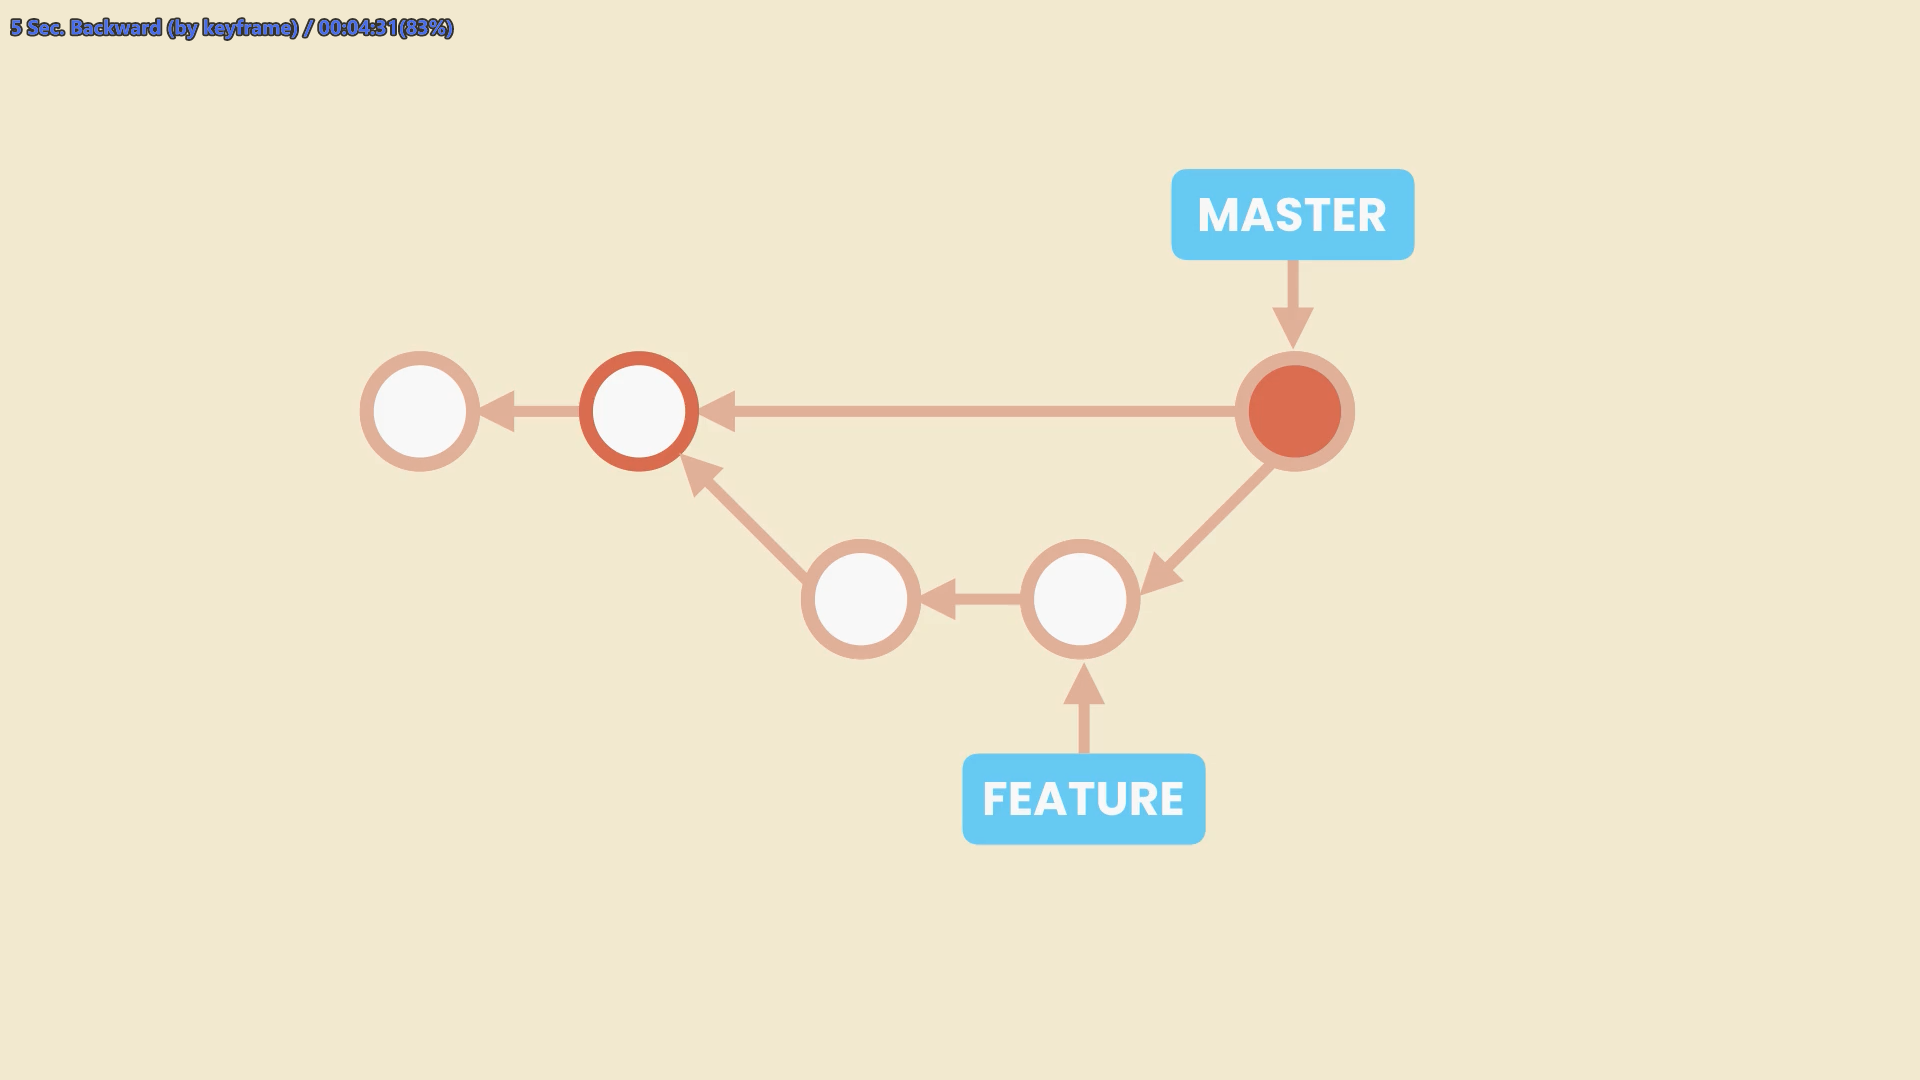

```sh
$ git revert HEAD
```

### ❌ Error Output:
```
error: commit 5c03854 is a merge but no -m option was given.
fatal: revert failed
```

📌 **Why did this fail?**
A merge commit has **two parents**, and Git needs to know which parent to keep.

✅ To revert the merge while keeping the changes from `master`, we use:

```sh
$ git revert -m 1 HEAD
```

### ✅ Output:
```
[master 6e0b0dd] Revert "Merge branch 'bugfix/change-password'"
 1 file changed, 1 insertion(+), 1 deletion(-)
```

🔹 `-m 1` tells Git to keep the **first parent** (master branch) while undoing the merge.

🔹 Let's verify the new history:

```sh
$ git log --oneline --all --graph
```

### ✅ Output:
```
* 6e0b0dd (HEAD -> master) Revert "Merge branch 'bugfix/change-password'"
*   5c03854 Merge branch 'bugfix/change-password'
|\
| * 397f30f (bugfix/change-password) Update change-password.txt
* | 8de2d9a Update change-password.txt
|/
```
A **new commit (6e0b0dd)** has been added to undo the merge!

---

## Understanding `git reset` Options


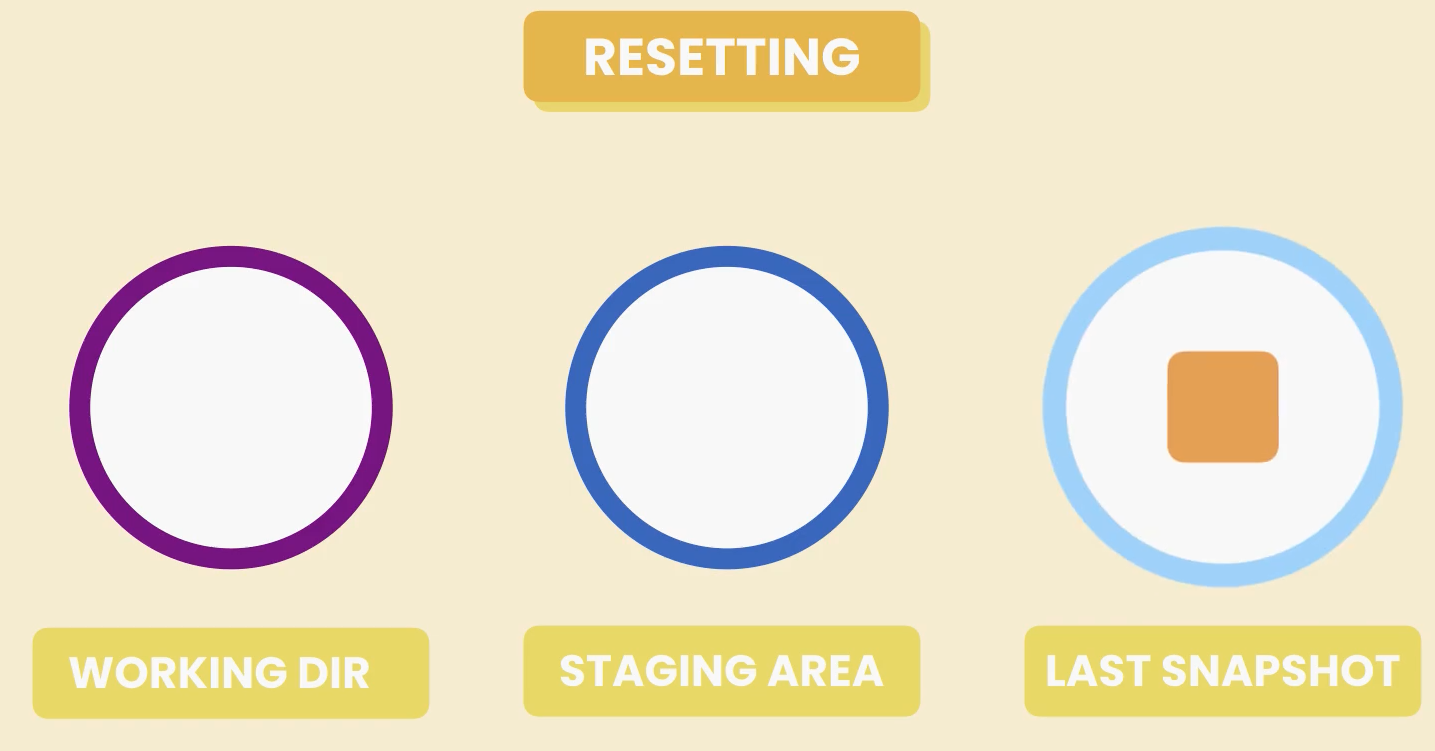


When we use `git reset`, we can specify different options to control what gets updated. These options determine how Git manipulates the HEAD, staging area, and working directory.

### 1. `git reset --soft <commit>`
- The HEAD pointer moves to the specified commit.
- The staging area (index) remains unchanged.
- The working directory remains unchanged.
- Example:
  ```sh
  git reset --soft HEAD~1
  ```
  This moves HEAD back by one commit but keeps the changes staged.

### 2. `git reset --mixed <commit>` (default)
- The HEAD pointer moves to the specified commit.
- The staging area is updated to match the new HEAD.
- The working directory remains unchanged.
- Example:
  ```sh
  git reset --mixed HEAD~1
  ```
  This resets the last commit and unstages the changes, but they remain in the working directory.

### 3. `git reset --hard <commit>`
- The HEAD pointer moves to the specified commit.
- The staging area is updated to match the new HEAD.
- The working directory is also updated, discarding any changes.
- Example:
  ```sh
  git reset --hard HEAD~1
  ```
  This removes the last commit and any local changes permanently.

### Summary Table
| Option | HEAD Moves | Staging Area Updates | Working Directory Updates |
|--------|------------|----------------------|-------------------------|
| `--soft` | ✅ | ❌ | ❌ |
| `--mixed` | ✅ | ✅ | ❌ |
| `--hard` | ✅ | ✅ | ✅ |

Be careful when using `--hard` as it will remove any uncommitted changes permanently!

---

## 📝 Summary
| Command | Action |
|---------|--------|
| `git log --oneline --all --graph` | View commit history |
| `git reset --hard HEAD~1` | Remove last commit (use only if not pushed) |
| `git reset --hard <commit-hash>` | Restore a removed commit |
| `git revert HEAD` | Undo last commit (fails for merge commits) |
| `git revert -m 1 HEAD` | Revert a merge commit and keep first parent |

🚀 **Best Practice:** Use `reset` only for local changes. If the merge has been pushed, always use `revert`!

---

💡 **Now you know how to safely undo a Git merge!** 🎉

